In [1]:
# Import libraries
import pandas as pd
import numpy as np 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Get the Unemployment Rate data from FRED 
Source: https://fred.stlouisfed.org/series/UNRATENSA#0

In [2]:
from google.colab import files
uploaded = files.upload()

Saving UNRATENSA.csv to UNRATENSA.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded["UNRATENSA.csv"]),index_col="DATE",parse_dates=True)

In [4]:
df.head()

,UNRATENSA
DATE,
2000-01-01,4.5
2000-02-01,4.4
2000-03-01,4.3
2000-04-01,3.7
2000-05-01,3.8


In [5]:
# Change column name 
df.columns = ["Unemployment_Rate"]

In [6]:
df.head()

,Unemployment_Rate
DATE,
2000-01-01,4.5
2000-02-01,4.4
2000-03-01,4.3
2000-04-01,3.7
2000-05-01,3.8


In [8]:
# Setting a DatetimeIndex Frequency
df.index.freq = "MS"
df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='DATE', length=246, freq='MS')

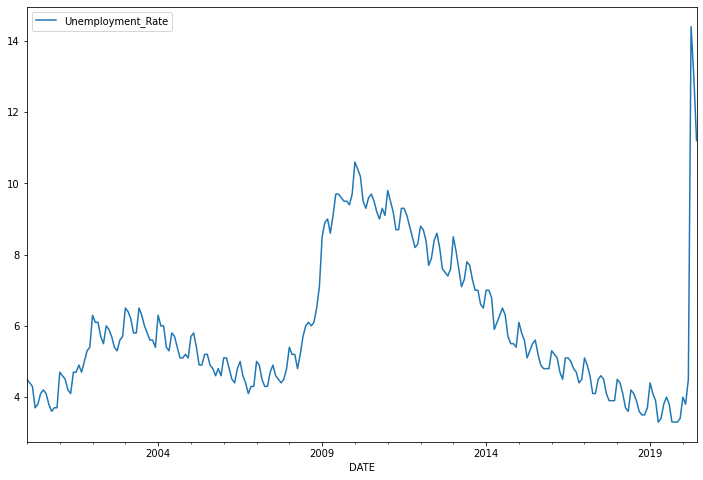

In [9]:
# Plot
df.plot(figsize=(12,8));

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
# Apply decompose and determine Error/Trend/Seasonality
result = seasonal_decompose(df["Unemployment_Rate"], model="multiplicative")

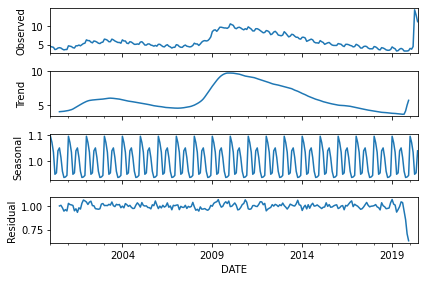

In [13]:
# We can clearly determine seasonal pattern
result.plot();

#### Simple Exponential Smoothing 

It is a method similar to the simple moving averages method but with different weights given to the previous period data. Simple Exponential Smoothing using just one smoothing factor  α (alpha).

In [14]:
span = 12
alpha = 2/(span+1)
df["SES12"]= SimpleExpSmoothing(df["Unemployment_Rate"]).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

,Unemployment_Rate,SES12
DATE,,
2000-01-01,4.5,4.500000
2000-02-01,4.4,4.484615
2000-03-01,4.3,4.456213
2000-04-01,3.7,4.339873
2000-05-01,3.8,4.256815


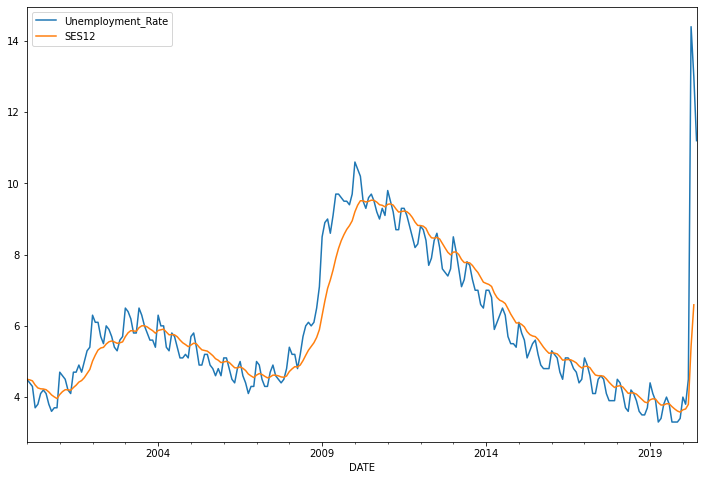

In [15]:
df[["Unemployment_Rate","SES12"]].plot(figsize=(12,8));

#### Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor  α  (alpha), Double Exponential Smoothing adds a second smoothing factor  β  (beta) that addresses trends in the data.

In [16]:
df["DES12"] = ExponentialSmoothing(df["Unemployment_Rate"], trend="mul").fit().fittedvalues.shift(-1)
df.head()

,Unemployment_Rate,SES12,DES12
DATE,,,
2000-01-01,4.5,4.500000,4.493243
2000-02-01,4.4,4.484615,4.393507
2000-03-01,4.3,4.456213,4.293658
2000-04-01,3.7,4.339873,3.695132
2000-05-01,3.8,4.256815,3.794180


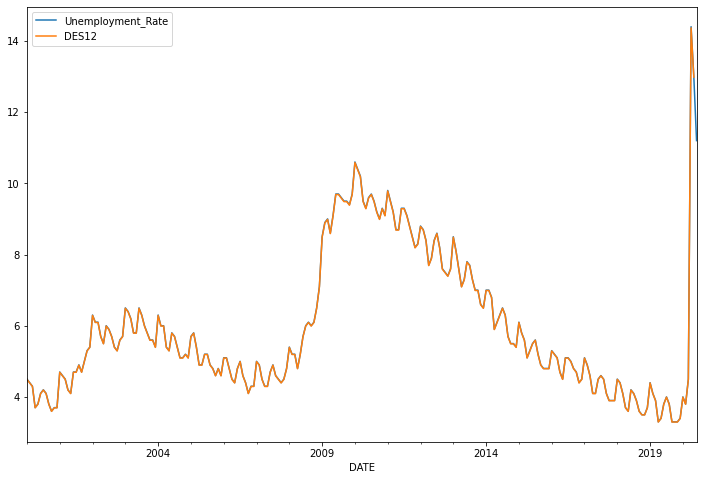

In [17]:
# Here we can see that Double Exponential Smoothing is a much better representation of the time series data.
df[["Unemployment_Rate","DES12"]].plot(figsize=(12,8));

#### Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data.

In [18]:
df["TES12"] = ExponentialSmoothing(df["Unemployment_Rate"],trend="mul",seasonal="add",seasonal_periods=12).fit().fittedvalues
df.head()

,Unemployment_Rate,SES12,DES12,TES12
DATE,,,,
2000-01-01,4.5,4.500000,4.493243,4.501058
2000-02-01,4.4,4.484615,4.393507,4.343235
2000-03-01,4.3,4.456213,4.293658,4.218384
2000-04-01,3.7,4.339873,3.695132,4.279879
2000-05-01,3.8,4.256815,3.794180,3.663268


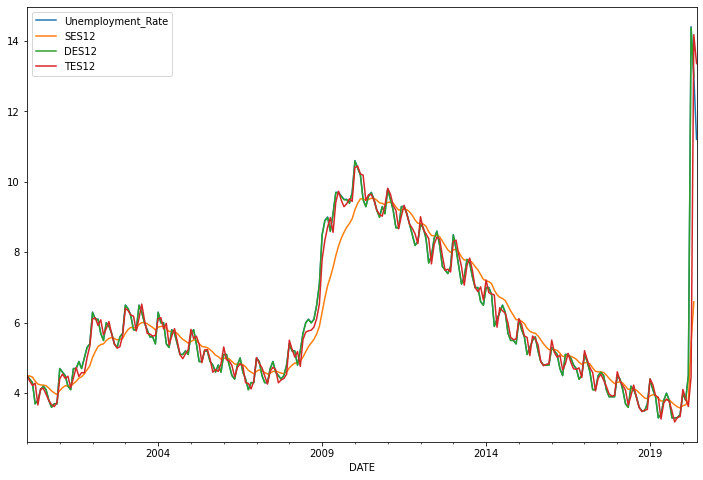

In [19]:
df[["Unemployment_Rate","SES12","DES12","TES12"]].plot(figsize=(12,8));

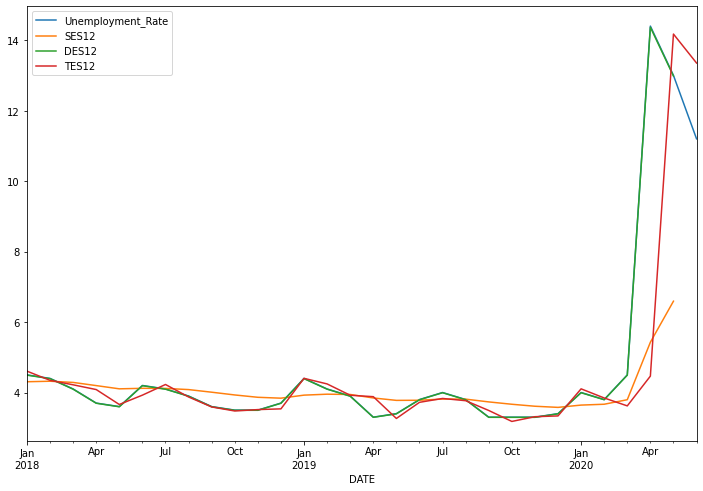

In [22]:
df[["Unemployment_Rate","SES12","DES12","TES12"]]["2018-01-01":].plot(figsize=(12,8));